In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_cleaned = pd.read_csv("chicago_accidents_cleaned.csv")

df_cleaned["crash_date"] = pd.to_datetime(df_cleaned["crash_date"], errors='coerce')

print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   crash_record_id                2862 non-null   object        
 1   crash_date                     2862 non-null   datetime64[ns]
 2   posted_speed_limit             2862 non-null   int64         
 3   traffic_control_device         2862 non-null   object        
 4   device_condition               2862 non-null   object        
 5   weather_condition              2862 non-null   object        
 6   lighting_condition             2862 non-null   object        
 7   first_crash_type               2862 non-null   object        
 8   trafficway_type                2862 non-null   object        
 9   alignment                      2862 non-null   object        
 10  roadway_surface_cond           2862 non-null   object        
 11  road_defect      

Analyze the time distribution of accidents

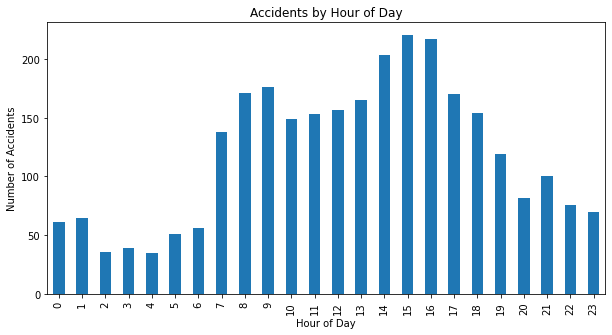

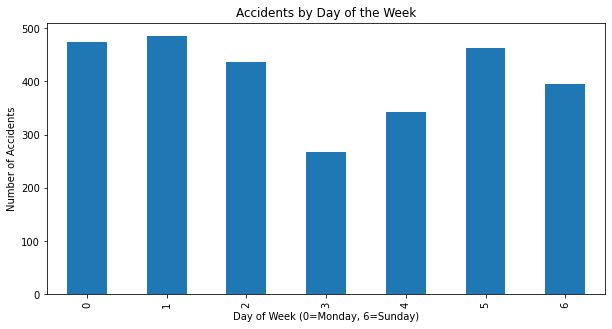

In [3]:
# Create new columns "hour" and "weekday" for analysis
df_cleaned["hour"] = df_cleaned["crash_date"].dt.hour  # Hour of accident occurrence
df_cleaned["weekday"] = df_cleaned["crash_date"].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)

# Count of accidents by hour
plt.figure(figsize=(10, 5))
df_cleaned["hour"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Hour of Day")
plt.show()

# Count of accidents by day of the week
plt.figure(figsize=(10, 5))
df_cleaned["weekday"].value_counts().sort_index().plot(kind="bar", xticks=range(7))
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Day of the Week")
plt.show()

Query specific accident details

In [6]:
def query_accident(crash_id):
    """Query specific accident details based on Crash_Record_ID"""
    result = df_cleaned[df_cleaned["crash_record_id"] == crash_id]
    if result.empty:
        print(f"Crash_Record_ID {crash_id} not found.")
    else:
        print("\n=== Accident Details ===")
        print(result.T)  # Transpose the output for better readability

query_accident("2e73f799fbc18795c6321096b24d819a77067c81fff97a53e16bc12337706ddf324a6beeb348db7f9e07e5006b6c1192f8a2f576d16d5d5cc369c164abffe6f7")  



=== Accident Details ===
                                                                             299
crash_record_id                2e73f799fbc18795c6321096b24d819a77067c81fff97a...
crash_date                                                   2025-03-04 15:35:00
posted_speed_limit                                                            30
traffic_control_device                                         STOP SIGN/FLASHER
device_condition                                            FUNCTIONING PROPERLY
weather_condition                                                           RAIN
lighting_condition                                                      DAYLIGHT
first_crash_type                                                      PEDESTRIAN
trafficway_type                                                   T-INTERSECTION
alignment                                                     STRAIGHT AND LEVEL
roadway_surface_cond                                                         WET
ro

Analyze accidents based on weather conditions

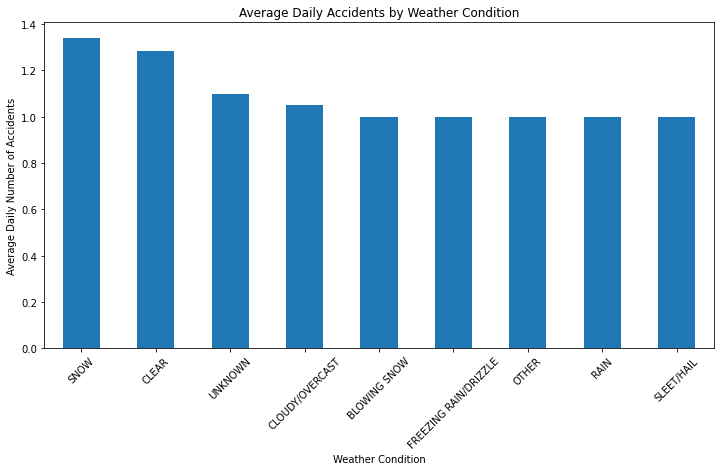

In [9]:
# Calculate the number of accidents per day
daily_accidents = df_cleaned.groupby(["crash_date", "weather_condition"]).size().reset_index(name="accident_count")

# Compute the total number of days for each weather condition
weather_days = daily_accidents.groupby("weather_condition")["crash_date"].nunique()

# Calculate the average number of accidents per day for each weather condition
weather_accidents = df_cleaned["weather_condition"].value_counts()
avg_accidents_per_day = weather_accidents / weather_days

plt.figure(figsize=(12, 6))
avg_accidents_per_day.sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Weather Condition")
plt.ylabel("Average Daily Number of Accidents")
plt.title("Average Daily Accidents by Weather Condition")
plt.xticks(rotation=45)
plt.show()